In [ ]:
'''
validate normalizatiob callback
'''
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np


model=Sequential()
model.add(Dense(128,activation='tanh'))
model.add(Dense(2))
opt=Adam(learning_rate=0.05)
model.compile(optimizer=opt,lose='mse',metrics=['mape'])



history=model.fit(inputs,targets,validation_split=0.2)#validation은 데이터의 20퍼센트가 유효성 검증을 위해 보류됨
# 두번째 차원은 2와 동일해야합니다. 네트워크 출력 레이어 차원과 일치해야하기 때문입니다?????이게 뭔말일까
print(history.history.keys()) #dict_keys(['loss','mape','val_loss','val_mape'])

In [ ]:
#중간 테스트
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p1)
model.fit(X_train, y_train, validation_split=p2)
#이게 p1은 전체에 대한 테스트 데이터셋
#p2는 훈련데이터 및 레이블의 일부 


model.compile(loss=‘binary_crossentropy’, metrics=[‘accuracy’, ‘mae’])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val))
# 몇개의 키? 전체 목록은 [‘loss’, ‘accuracy’, ’mae’, ‘val_loss’, ‘val_accuracy’, ’val_mae’]

In [ ]:
'''
당뇨 데이터를 통한 validation set 실습
'''

from sklearn.datasets import load_diabetes

diabetes_dataset=load_diabetes()
#print(diabetes_dataset["DESCR"])

In [14]:
#print(diabetes_dataset.keys())
import numpy as np
data=diabetes_dataset["data"]
targets=diabetes_dataset["target"]

targets=(targets-targets.mean(axis=0))/targets.std() #이게 표준편차로 나누는거

(442,)

In [21]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.1)
print(train_data.shape,
test_data.shape,
train_targets.shape,
test_targets.shape)

(397, 10) (45, 10) (397,) (45,)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers

def get_model(wd,rate):
    model=Sequential([
        Dense(128,kernel_regularizer=regularizers.l2(wd),activation="relu",input_shape=(train_data.shape[1],)),
         Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(1),    
    ])
    return model

In [78]:
'''
정규화 한 모델 컴파일 및 핏
'''
model=get_model(1e-5,0.5)
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#왜 mse를 쓰는거지??이거는 10가지 특성을 보고 당뇨인지 아닌지 판별하는거 아니야?? 

history=model.fit(train_data,train_targets,epochs=500,validation_split=0.15,batch_size=64,verbose=False)


In [ ]:

'''ㅇ
정규화 하기 이전
'''
model.compile(optimizer="adam",loss="mse",metrics=["mae"])
history=model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=0)
#model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=2)

model.evaluate(test_data,test_targets,verbose=2)

In [ ]:
'''
모델 정규화 model regularization
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential([
    Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.005,l2=0.001),
    bias_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='softmax')
])

model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['acc'])
model.fit(inputs,targets,validation_split=0.25)

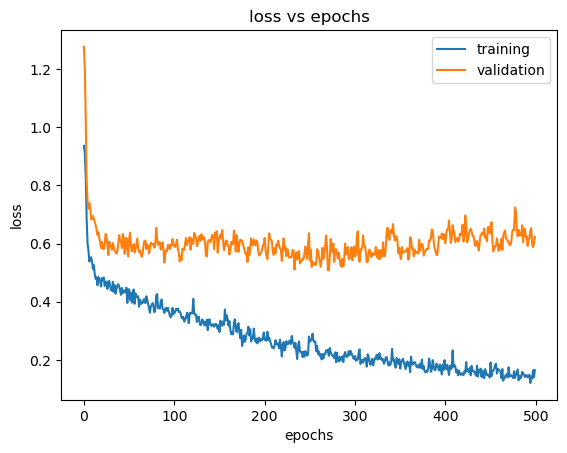

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper right')
plt.show()


In [ ]:
'''
콜백 개념 소개 및 실습
'''
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
    def on_train_begin(self,logs=None):
        # 학습 시작시 무엇인가 action을 한다
    
    def on_train_batch_begin(self,batch,logs=None):
        # 배치 시작시 무엇인가 action을 한다.
    
    def on_train_batch_begin(self,epoch,logs=None):
        # 에폭 시작시 무엇인가 action을 한다.

    # 콜백 함수를 정의했다면 다음은 model.fit으로 해당 데이터를 패싱하는 것
model.fit(X_train,y_train,epochs=5,callbacks=[my_callback()]) #핏은 콜백 키워드 인수가 있어ㅓ
# model.fit은 히스토리 오브젝트를 리턴함

In [102]:
'''
콜백함수 실습
'''
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):

    def on_train_begin(self,logs=None):
        print('학습 시작')

    def on_epoch_begin(self,epoch,logs=None): 
        print('epoch 시작: {0}'.format(epoch))

    def on_train_batch_begin(self,batch,logs=None):
        print('batch 시작: {0}'.format(batch))

    def on_train_batch_end(self,batch,logs=None):
        print('batch 끝: {0}'.format(batch))

    def on_epoch_end(self,epoch,logs=None):
        print('epoch 끝: {0}'.format(epoch))
    
    def on_train_end(self,logs=None):
        print('학습 끝')

#해당 클래스에 콜백시 함수 이름 잘 맞춰줘야됨


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers



def get_model(wd,rate):
    model=Sequential([
        Dense(128,kernel_regularizer=regularizers.l2(wd),activation="relu",input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(1),    
    ])
    return model

model=get_model(1e-5,0.5)
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.fit(train_data,train_targets,epochs=10,batch_size=128,verbose=False,callbacks=[TrainingCallback()])


In [ ]:
'''
테스팅콜백함수 생성
'''
from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):

    def on_test_begin(self,logs=None):
        print('학습 시작')

    def on_test_batch_begin(self,batch,logs=None):
        print('batch 시작: {0}'.format(batch))

    def on_test_batch_end(self,batch,logs=None):
        print('batch 끝: {0}'.format(batch))

    def on_test_end(self,logs=None):
        print('학습 끝')



model.evaluate(test_data,test_targets,verbose=False, callbacks=[TestingCallback()])

In [ ]:
'''
조기중지 및 인내?? 
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential([
    Conv1D(16,5,activation='relu',input_shape=(128,1)),
    MaxPooling1D(4),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stopping=EarlyStopping(monitor='val_loss',patience=5,min_delta=0.01,mode='max')
#val_accuracy이거 사용할 수도 있음 
#여기 패싱되는 문자열의 이름은 히스토리 오브젝트안에 키중 하나와 같음
#기본값은 0-> 한에포크와 다음 에포크사이에서 성능 측정치가 악화되는 순간 훈련이 정지
#min_delta는 해당 모니터의 최소 향상 변위임->이거보다 작게 양의 방향으로 변하더라도 patience는 1증가함

model.fit(X_train,y_train,validation_split=0.2,epochs=100,callbacks=[early_stopping])


